### (a) Discussion
A reasonable distribution to model X, the number of points Dr. Gerber scored in a single game, is the Poisson distribution, which is commonly used to model discrete counts of “rare” events within a fixed period. Points in a basketball game can be viewed as relatively infrequent, independent scoring “events” that occur with some average rate λ per game. Although the Poisson assumptions are not exact, this distribution often approximates low-count data reasonably well, making it a natural choice for modeling Dr. Gerber’s point totals.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv("drg_points.csv")
points = df['points']

# Compute MLE
lambda_hat = np.mean(points)

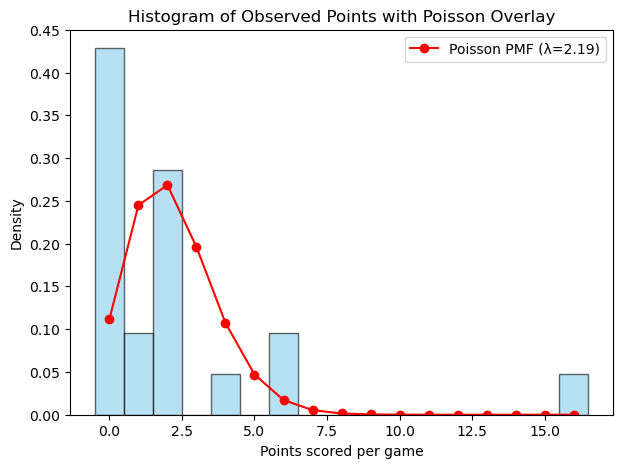

In [3]:
# Histogram
plt.figure(figsize=(7, 5))

count_vals, bin_edges, _ = plt.hist(points, bins=range(0, max(points)+2),
                                    density=True, alpha=0.6, color='skyblue',
                                    align='left', edgecolor='black')
# Poisson PMF values
x_vals = np.arange(0, max(points)+1)
pmf_vals = poisson.pmf(x_vals, lambda_hat)

plt.plot(x_vals, pmf_vals, 'o-', color='red', label='Poisson PMF (λ={:.2f})'.format(lambda_hat))

plt.xlabel('Points scored per game')
plt.ylabel('Density')
plt.title('Histogram of Observed Points with Poisson Overlay')
plt.legend()
plt.show()

### (c) Discussion
From the histogram and Poisson overlay, we can see that there is a large spike at 0 points—which the Poisson model with λ≈2.19 underestimates—and there is also a right‐tail outlier around 15 points that the Poisson pmf nearly ignores. In principle, the Poisson assumption (mean = variance) does not quite match these data: the empirical variance is higher than the mean (suggesting overdispersion). Visually, most of the middle part of the distribution is reasonably approximated, but the Poisson curve is too low at 0 points and too low in the right tail. Thus, although the Poisson is not a terrible first attempt, the mismatch at zero and the high outlier indicate that a more flexible model might be a better fit.